# **Single Hidden Neural Network**

---

In [1]:
# Getting python's version

import sys

print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [2]:
# Importing numpy package
import numpy as np

print(np.__version__)

1.18.5


## **Table of Contents**



1.  layers_sizes helper function
2.  Random initializing parameters
3.  Sigmoid as activation function
4.  Forward Propagation
5.  Computing cost
6.  Backpropagation
7.  Update parameters
8.  Neural Network Model
9.  Predict classes function
10.  Testing



---

*** Neural Network Structure ***

    layers     : input - hidden - output
    activations:         tanh     sigmoid

    cost function: 
        J = - (1/m) * np.sum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A)))

In [3]:
# Get layers sizes
def layers_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_y)

In [4]:
# Initialize parameters
def initialize_parameters(n_x, n_h, n_y, init_const=0.01, seed=None):
    if seed:
        np.random.seed(seed)

    # initializing parameters
    W1 = np.random.randn(n_h, n_x) * init_const
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * init_const
    b2 = np.zeros((n_y, 1))

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [5]:
# Sigmoid function
def sigmoid(Z):
    S = 1/(1 + np.exp(-Z))
    return S

In [6]:
# Forward propagation
def forward_propagation(X, parameters):
    # Retriving parameters
    W1 = parameters['W1']         
    b1 = parameters['b1']         
    W2 = parameters['W2']         
    b2 = parameters['b2']

    # Implementing forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Cache for efficient backward propagation
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }

    return A2, cache

In [7]:
# Compute cost
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of examples

    # Retriving parameters
    W1 = parameters['W1']         
    W2 = parameters['W2']

    cost = - (1/m) * np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)))
    cost = np.squeeze(cost) # makes sure cost is the dimension we expect. # E.g., turns [[17]] into 17

    return cost

In [8]:
# Backward propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1] # number of examples

    # Retriving parameters
    W1 = parameters['W1']         
    W2 = parameters['W2']

    # Retriving caches
    A1 = cache['A1']
    A2 = cache['A2']

    # Implementing backward propagation
    dZ2 = A2 - Y
    dW2 = (1/m) * (np.dot(dZ2, A1.T))
    db2 = (1/m) * (np.sum(dZ2, axis=1, keepdims=True))
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * (np.sum(dZ1, axis=1, keepdims=True))

    # Gradients(derivatives)
    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return grads

In [9]:
# Update parameters
def update_parameters(parameters, grads, learning_rate=0.01):
    # Retriving parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retriving gradient
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [10]:
# Neural Network Model
def model(X, Y, n_h, learning_rate=0.01, init_const=0.01, number_of_iterations=10000, print_cost=True, print_cost_after=1000, seed=None):
    n_x, n_y = layers_sizes(X, Y)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y, init_const, seed)

    # Gradient Descent
    for i in range(number_of_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(A2, Y, parameters)

        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Priniting cost after given iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [11]:
# Predict classes for given examples
def predict(parameters, X, threshold=0.5):
    A2, cache = forward_propagation(X, parameters)
    A2[A2 < threshold] = 0
    A2[A2 >= threshold] = 1
    return A2 # predictions

---
## **Testing**

In [12]:
# Importing packages

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [13]:
# Helper functions for generating datasets and plotting


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def predict_dec(parameters, X, threshold=0.5):    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>threshold)
    return predictions

# Example of plotting decision boundary
# plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y


def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [14]:
# Loading the planar dataset
X, Y = load_planar_dataset()

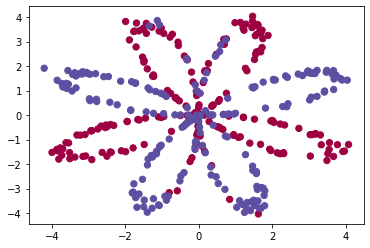

In [15]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


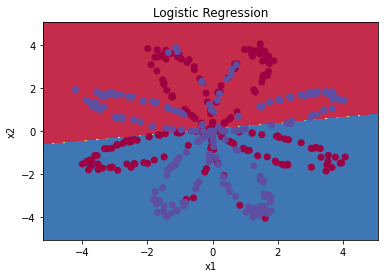

In [16]:
# Using simple logistic regression

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) + '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.693089
Cost after iteration 1000: 0.276971
Cost after iteration 2000: 0.237048
Cost after iteration 3000: 0.213182
Cost after iteration 4000: 0.192977
Cost after iteration 5000: 0.180836
Cost after iteration 6000: 0.173355
Cost after iteration 7000: 0.167993
Cost after iteration 8000: 0.165920
Cost after iteration 9000: 0.164347


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

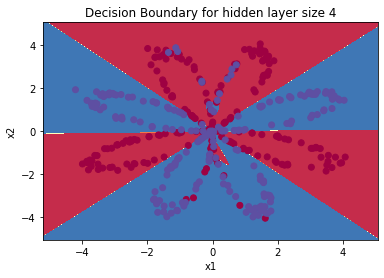

In [17]:
# Using Neural Network

# Build a model with a n_h-dimensional hidden layer
parameters = model(X, Y, n_h = 10, learning_rate=1.5, number_of_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [18]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


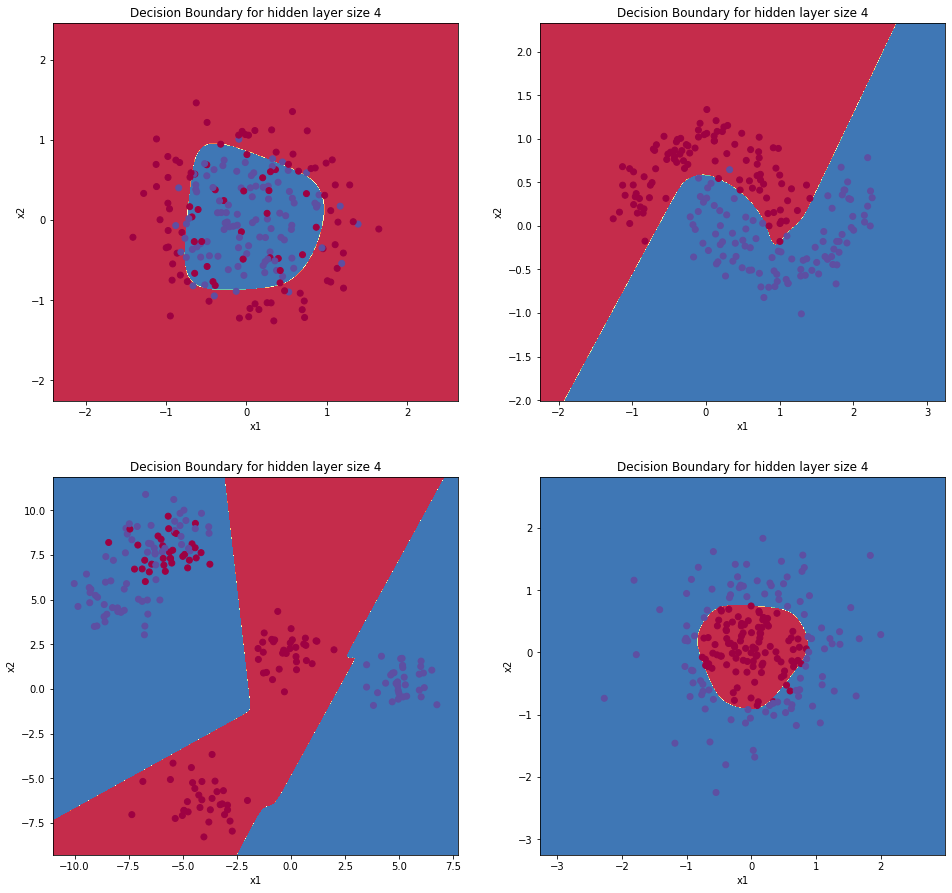

In [19]:
# Using single hidden layer model on other generated datasets

# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {
    'noisy_circles': noisy_circles,
    'noisy_moons': noisy_moons,
    'blobs': blobs,
    'gaussian_quantiles': gaussian_quantiles
}


plt.figure(figsize=(16, 32))

for i, dataset in enumerate(datasets):
    plt.subplot(4, 2, i+1)
    plt.title(dataset)
    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
    
    # Build a model with a n_h-dimensional hidden layer
    parameters = model(X, Y, n_h = 4, learning_rate=1.2, number_of_iterations = 10000, print_cost=False)

    # Plot the decision boundary
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    plt.title("Decision Boundary for hidden layer size " + str(4))

---